# K-Means 

You have following two dimensional data set:

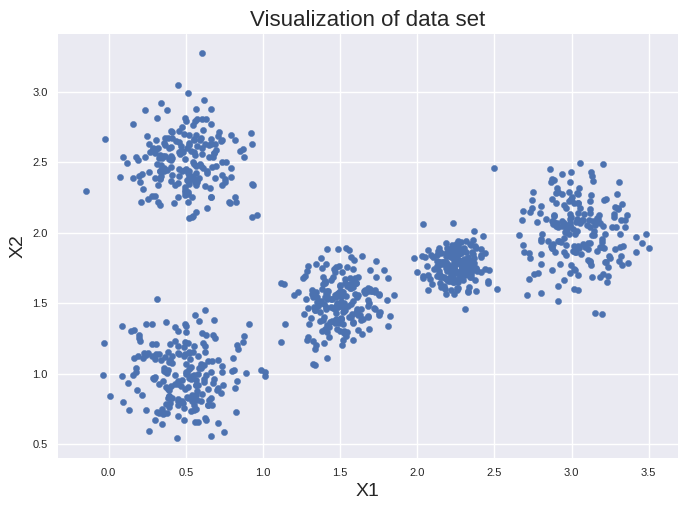

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('cluster1_data.csv')

x1 = X['X1']
x2 = X['X2']

plt.style.use('seaborn-v0_8')

plt.scatter(x1, x2, s=20)
plt.title("Visualization of data set", fontsize=16)
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

Clearly visible are five clusters. K-means is one of the fasted clustering approaches scaling linear with the number of clusters $k$, the number of instances $m$ and the number of input features $n$. It seems reasonable to use it for our example since this approach assigns data points to a clusters based on a distance cutoff to a centroid.

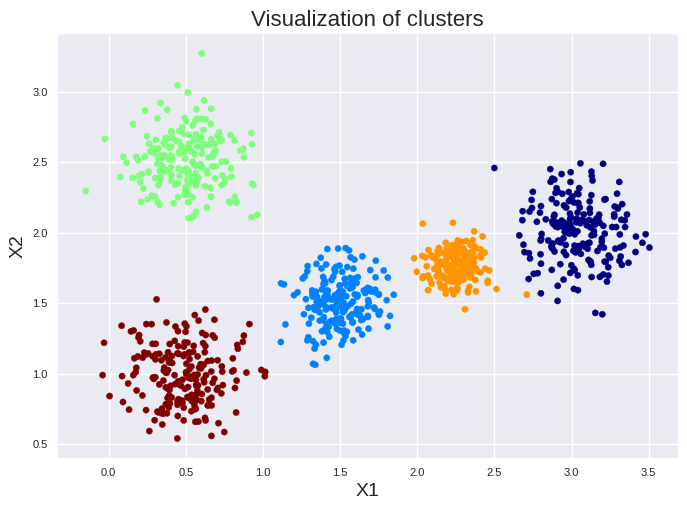

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, init='random', random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(x1, x2, c=kmeans.labels_, cmap=plt.cm.jet, s=20)
plt.title("Visualization of clusters", fontsize=16)
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

We clustered our data successfully. "kmeans.labels_" are the labels assigned by the clustering approach. We can access them also by "y_pred" for our example.

In [3]:
y_pred is kmeans.labels_

True

We can store our labels together with our data set by:

In [4]:
import numpy as np

store_labels = np.vstack((x1,x2,kmeans.labels_))
df = pd.DataFrame(store_labels.T)

path= 'cluster1_data_labeled.csv'
df.to_csv(path, header=['X1','X2','label'], index=False)

Instead of hard clustering where each data point is assigned to a single cluster, we can also provide a scoring function. We can get the distance of each instance to the nearest cluster as follow: 

In [5]:
kmeans.transform(X[:5]).round(2)

array([[1.45, 0.17, 1.47, 0.62, 1.31],
       [1.42, 0.26, 1.65, 0.6 , 1.34],
       [2.91, 1.67, 0.32, 2.21, 1.57],
       [0.73, 0.89, 2.  , 0.11, 2.02],
       [2.99, 1.4 , 1.8 , 2.17, 0.31]])

Soft clustering is an efficient approach for nonlinear dimensionality reduction of a data set. 

To understand all hyperparameters used in the example above, we must understand how k-means work. It starts by placing randomly $k$ cluster centers. $k$ is set by "n_clusters". Then it labels the instances based on the distance to the initial centroids, calculate the new center of each cluster by the mean values of the input features of that cluster, label the instances again, update the center of the clusters again, and so on
until the centroids stop moving. The algorithm converge usually in few cycles. However, the result strongly depends on the initial cluster centers. Therefore, we have set "n_init" to 10 to have 10 runs with different initial centroids. Nonetheless, it is not guaranteed that the optimal solution is found. We can also suggest the initial centroids:

In [6]:
cluster_init = np.array([[0.5, 1], [0.5, 2.5], [1.5, 1.5], [2.2, 1.7], [3, 2]])

kmeans = KMeans(n_clusters=5, n_init=1, init=cluster_init)
y_pred = kmeans.fit_predict(X)

We can also use "kmeans++" (default choice) for an educated guess instead of "random" or a list of cluster centers. Kmeans++ selects randomly the first centroid from the instances. The next centroid is selected from the instances based on a probability function preferring a large distance to all centroids selected so far. This is repeated until all initial centroids are obtained. More details can be found here: <a href="http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf">Link to work of David Arthur and Sergei Vassilvitskii</a>

But how is the quality of a cluster set assessed finally? A metric called inertia is used which is the sum of the squared distances between each instance and the closest centroid. Thus, the smaller the inertia, the better is the obtained clustering. You can get the inertia of your model as follow: 

In [7]:
kmeans.inertia_

59.13523349868847

We can get also other values of our clustering approach as follow:

In [8]:
print('Number of instances in each cluster:')
print(pd.DataFrame(kmeans.labels_).value_counts())

print('\n Coordinates of the centroids:')
print(kmeans.cluster_centers_)

print('\n Check the assigned cluster of an instance:')
print(kmeans.predict(X.iloc[[42]]))

print('\n Check the distance to each centroid for an instance:')
print(kmeans.transform(X.iloc[[42]]).round(2))

Number of instances in each cluster:
0
2    201
3    201
1    200
0    199
4    199
Name: count, dtype: int64

 Coordinates of the centroids:
[[0.48469264 0.99567306]
 [0.50126845 2.507751  ]
 [1.50092071 1.50892923]
 [2.25248093 1.76205391]
 [3.04154746 2.01475778]]

 Check the assigned cluster of an instance:
[2]

 Check the distance to each centroid for an instance:
[[1.32 1.6  0.22 0.61 1.43]]


In our example, we have selected 5 clusters after a visual inspection of the data. If we want to do it in a more systematic way we can plot the inertia vs. the number of clusters.  

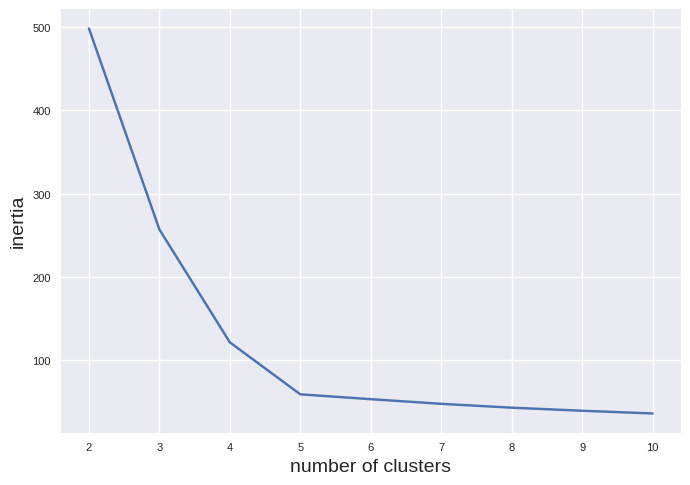

In [4]:
# This code will go from 2 to 10 for k.
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42).fit(X) for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

import matplotlib.pyplot as plt

plt.plot(range(2,11), inertias)
plt.xlabel("number of clusters", fontsize=14)
plt.ylabel("inertia", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

As you can see, the iniertia is smaller with increasing number of clusters. This is expected since a larger number of clusters should support smaller distances to the closest centroid. However, there is an elbow in the fit at about 5 clusters. You can use this but it is overall prone to errors. A better choice is the silhouette score:   

In [6]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, n_init=10, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

silhouette_score(X, kmeans.labels_)

0.6848361583095941

The silhouette is a measure how similar an object is to its own cluster compared to other clusters. It can be between -1 and 1. A value close to 1 is desirable since the instance is inside its own cluster and far from other clusters. A value close to 0 means, the instance is close to the cluster boundary. Negative values indicate a wrong assignment of an instance to a cluster. More details can be found on Wikipedia (<a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Link</a>). The score function provides the mean silhouette. We can plot the mean silhouette depending on the number of clusters for our example as follow:  

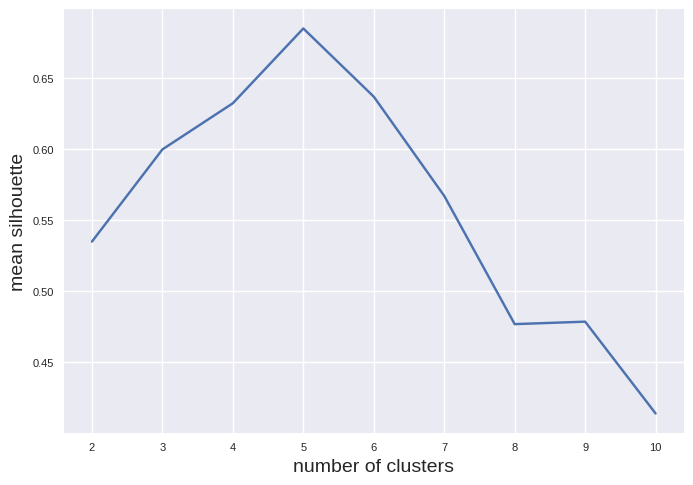

In [7]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

plt.plot(range(2,11), silhouette_scores)
plt.xlabel("number of clusters", fontsize=14)
plt.ylabel("mean silhouette", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

The maximum is clearly visible for 5 clusters. Please note, k-means is prone to errors if the clusters have varying sizes, different densities, or nonspherical shapes. Thus, it will tend to fail for ellipsoids:

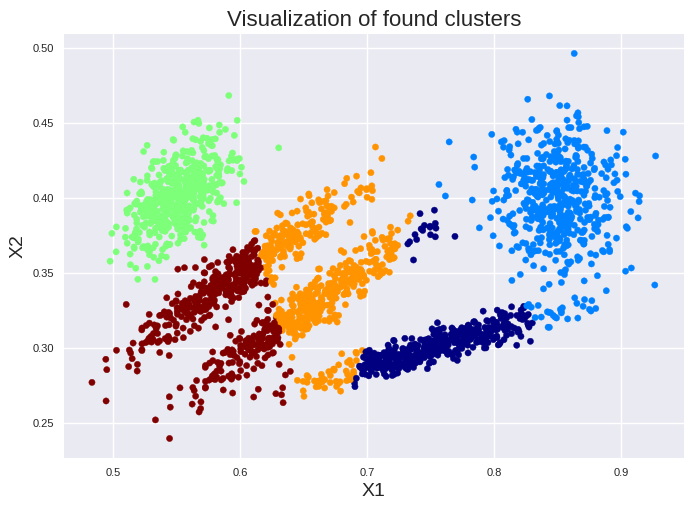

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('cluster2_data.csv')

x1 = X['X1']
x2 = X['X2']

kmeans = KMeans(n_clusters=5, n_init=10, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(x1, x2, c=kmeans.labels_, cmap=plt.cm.jet, s=20)
plt.title("Visualization of found clusters", fontsize=16)
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()